[View in Colaboratory](https://colab.research.google.com/github/kmanicka/CarND-Behavioral-Cloning-P3/blob/master/Model.ipynb)

# Udacity Car ND : Behavioral Cloning Project

This notebook is used to build and train the model used for driving the car autonomously 


##  Workspace setup

* clean the workspace 
* download and unzip files. 
* list and assert files


* date > log.txt
* rm -rf *.zip  >> log.txt 2>&1
* wget https://d17h27t6h515a5.cloudfront.net/topher/2016/December/584f6edd_data/data.zip >> log.txt 2>&1
* unzip data.zip >> log.txt 2>&1
* date >> log.txt 2>&1

* ls
* ls data
* ls data/IMG | wc


## Load Data 

* load image
* load csv file 


In [1]:
import numpy as np
import pandas as pd
from skimage.io import imread_collection

images_raw = imread_collection('../data/IMG/center*',conserve_memory=True)
driving_log=pd.read_csv('../data/driving_log.csv', sep=',')

driving_log.describe()

,steering,throttle,brake,speed
count,8036.000000,8036.000000,8036.000000,8036.000000
mean,0.004070,0.869660,0.001970,28.169839
std,0.128840,0.301326,0.036565,6.149327
min,-0.942695,0.000000,0.000000,0.502490
25%,0.000000,0.985533,0.000000,30.183093
50%,0.000000,0.985533,0.000000,30.186400
75%,0.000000,0.985533,0.000000,30.186640
max,1.000000,0.985533,1.000000,30.709360


## Prepare Data

* X_train as the images 
* Y_train as the steering

In [2]:
X_train = np.array(images_raw)


Y_train = driving_log['steering']
Y_train = np.reshape(Y_train, (Y_train.shape[0],1))

train_n = X_train.shape[0]
image_height = X_train.shape[1]
image_width = X_train.shape[2]
image_channels = X_train.shape[3]

print('Number of training samples ',train_n)
print('Image Height ',image_height)
print('Image Width ',image_width)
print('Image Channels ',image_channels)

print(X_train.shape)
print(Y_train.shape)


Number of training samples  8036
Image Height  160
Image Width  320
Image Channels  3
(8036, 160, 320, 3)
(8036, 1)


/home/paperspace/anaconda3/envs/fastai/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


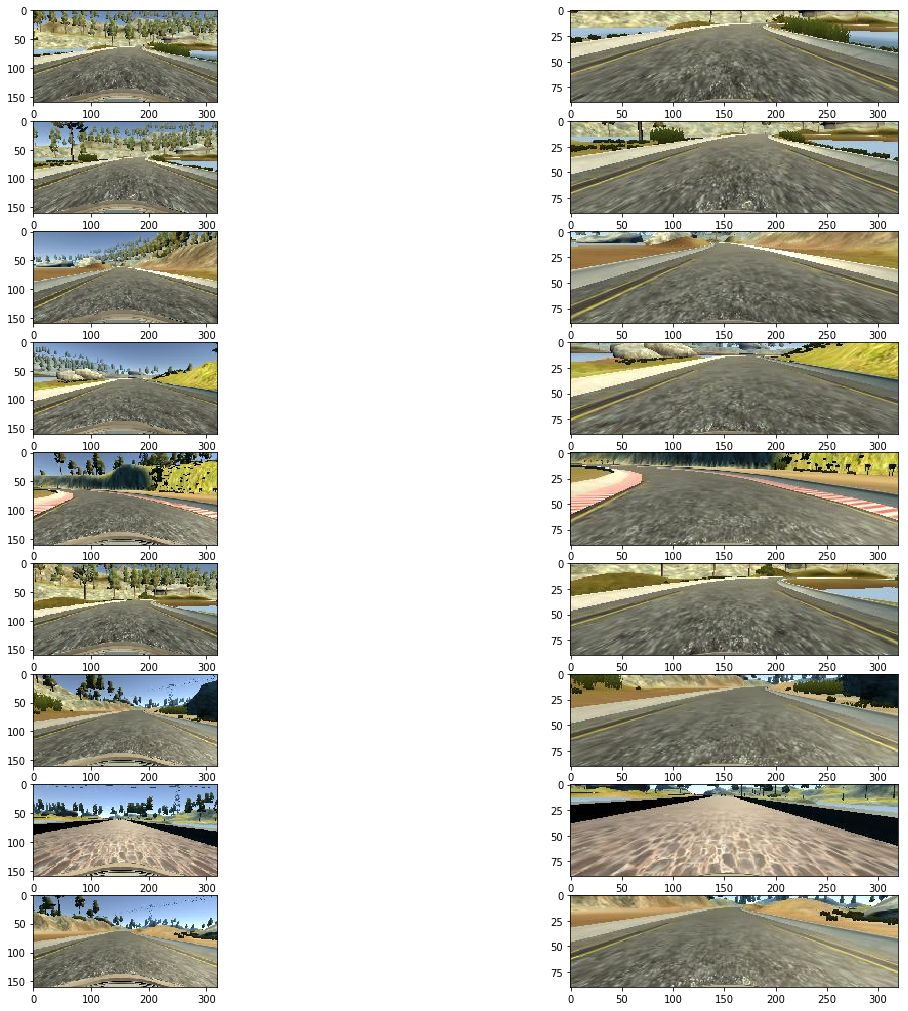

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

fig=plt.figure(figsize=(20, 20))
rows,columns = 10,2

i=0

for j in range(1,rows):
    n = np.random.randint(train_n)
    
    i=i+1
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[n])

    i=i+1
    fig.add_subplot(rows, columns, i)
    plt.imshow(X_train[n,50:140,:,:])



In [24]:
# Reducing Training
#X_train = X_train[:,50:140,:,:] 
# Normalize Training
#print(X_train[0,0,0])
#X_train = (X_train - 128.) / 128.  # this is not working. causing memory error. 
#print(X_train[0,0,0])

[ 2 14 14]
[-0.984375 -0.890625 -0.890625]


In [25]:
 print(X_train.shape)

(8036, 90, 320, 3)


# Build and Train Model

* Build 
* Train 


In [5]:
from keras.models import Sequential
from keras.layers import Input, Dense, Flatten, Dropout, Activation
from keras.layers import Conv2D, MaxPooling2D, Cropping2D,Lambda 


def get_model(input_shape) :

    model = Sequential()
    
    #Layer Normilization
    model.add(Lambda(lambda x: (x / 255.0) - 0.5, input_shape=input_shape))
    
    #Layer Cropping
    model.add(Cropping2D(cropping=((50,20), (0,0))))

    #Layer Conv 1 
    model.add(Conv2D(4, (5, 5), padding="valid"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

    #Layer Conv 2
    model.add(Conv2D(8, (5, 5), padding="valid"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.25))


    #Layer Conv 3
    model.add(Conv2D(16, (5, 5), padding="valid"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())

    #Layer Dense 1
    model.add(Dense(32))
    model.add(Activation("relu"))
    model.add(Dropout(0.25))

    #Layer Dense 2
    model.add(Dense(8))
    model.add(Activation("relu"))
    model.add(Dropout(0.25))

    #Layer Dense 4
    model.add(Dense(1)) 

    model.compile(loss='mse', optimizer='adam')


    return model



model = get_model((X_train.shape[1],X_train.shape[2],X_train.shape[3]))
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_2 (Lambda)            (None, 160, 320, 3)       0         
_________________________________________________________________
cropping2d_2 (Cropping2D)    (None, 90, 320, 3)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 86, 316, 4)        304       
_________________________________________________________________
activation_6 (Activation)    (None, 86, 316, 4)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 43, 158, 4)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 39, 154, 8)        808       
_________________________________________________________________
activation_7 (Activation)    (None, 39, 154, 8)        0         
__________

In [6]:
from keras.callbacks import ModelCheckpoint
  
filepath="weights-4-{epoch:02d}.hdf5"

checkpoint = ModelCheckpoint(filepath, verbose=1)

history = model.fit(X_train, Y_train, 
                    validation_split=0.2,
                    shuffle=True, 
                    epochs=10, 
                    batch_size=32,
                    callbacks=[checkpoint])



Train on 6428 samples, validate on 1608 samples
Epoch 1/10
6428/6428 [==============================] - 14s 2ms/step - loss: 0.0136 - val_loss: 0.0122

Epoch 00001: saving model to weights-4-01.hdf5
Epoch 2/10
6428/6428 [==============================] - 7s 1ms/step - loss: 0.0120 - val_loss: 0.0115

Epoch 00002: saving model to weights-4-02.hdf5
Epoch 3/10
6428/6428 [==============================] - 7s 1ms/step - loss: 0.0113 - val_loss: 0.0113

Epoch 00003: saving model to weights-4-03.hdf5
Epoch 4/10
6428/6428 [==============================] - 7s 1ms/step - loss: 0.0111 - val_loss: 0.0104

Epoch 00004: saving model to weights-4-04.hdf5
Epoch 5/10
6428/6428 [==============================] - 7s 1ms/step - loss: 0.0110 - val_loss: 0.0117

Epoch 00005: saving model to weights-4-05.hdf5
Epoch 6/10
6428/6428 [==============================] - 7s 1ms/step - loss: 0.0110 - val_loss: 0.0111

Epoch 00006: saving model to weights-4-06.hdf5
Epoch 7/10
6428/6428 [=============================

# Iterations 

#### Iteration 2
A basic Lenet Model updated for linear regression. 


#### Iteration 3
- Reduced the image height to concentrate on roads only.  
- the training and prediction image has changed. 

Result: The car drived well till it got distracted at road with brown road curb.  

#### Iteration 4
- Normalization and croping in the Keras Layer
- Files changed the model and the drive.py 
